# <center>        **Introduction to Data Science (S1-22_DSECLZG523)-ASSIGNMENT**</center>

## Group No : IDS Group 06

## Group Member Names:
1. SUMIL KHOSLA
2. RAJNEESH KUMAR
3. REVATHI G
4. CHAVAN JEEVAN MADHUKAR

# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

**1. Business problem**: To analyse Telco customer churn and predict behavior to retain customers

**2. Data requirement**: Customer account information (Payment method, monthly charges, contract, etc.), Services availed by customers (phone, internet, online security/backup, etc.), Demographic information about customers

**3. Source of data**: IBM sample data sets

**4. Type of analytics task** : Predictive analytics

#### Description of the Telco Customer Churn dataset
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The raw data contains 7043 rows (customers) and 21 columns (features).:

-    **Customer ID**: Unique ID of customer ---------------------------------------------- **Categorical**
-    **gender**: Whether the customer is a male or a female------------------------------- **Categorical**
-    **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)------------ **Categorical**
-    **Partner**: Whether the customer has a partner or not (Yes, No)--------------------- **Categorical**
-    **Dependents**: Whether the customer has dependents or not (Yes, No)----------------- **Categorical**
-    **tenure**: Number of months the customer has stayed with the company --------------- **Numerical**
-    **PhoneService**: Whether the customer has a phone service or not (Yes, No)----------------------------- **Categorical**
-    **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)----------- **Categorical**
-    **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)------------------------ **Categorical**
-    **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)------ **Categorical**
-    **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)---------- **Categorical**
-    **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)---**Categorical**
-    **TechSupport**: Whether the customer has Technical support or not (Yes, No, No internet service)------- **Categorical**
-    **StreamingTV**: Whether the customer is streaming TV or not (Yes, No, No internet service)------------- **Categorical**
-    **StreamingMovies**: Whether the customer is streaming movie or not (Yes, No, No internet service)------ **Categorical**
-    **Contract**: Contract duration of the customer (Month-to-month, One year, Two year)-------------------- **Categorical**
-    **PaperlessBilling**: Whether customer has opted for paperless billing or not (Yes, No)----------------- **Categorical**
-    **PaymentMethod**: Payment method by customer (Bank transfer, Credit card, Electronic check, Mailed check)-**Categorical**
-    **MonthlyCharges**: Monthly charge by customer ---------------- **Numerical**
-    **TotalCharges**: Total charge by customer -------------------- **Numerical**
-    **Churn**: Whether the customer has churned or not (Yes, No)--- **Categorical**


The goal of the dataset is to predict churn of the customer.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import zipfile
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
warnings.filterwarnings("ignore")

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [2]:
##---------Type the code below this line------------------##

In [3]:
! pip install kaggle

In [4]:
os.environ['KAGGLE_USERNAME'] = 'sumilk'
os.environ['KAGGLE_KEY'] = '56d698509e70267de88b382bcc4126b6'

#download the dataset
!kaggle datasets download -d blastchar/telco-customer-churn


  0%|          | 0.00/172k [00:00<?, ?B/s]
100%|##########| 172k/172k [00:00<00:00, 1.02MB/s]
100%|##########| 172k/172k [00:00<00:00, 1.02MB/s]


In [5]:
#extracting the dataset
with zipfile.ZipFile('telco-customer-churn.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

## 2.2 Code for converting the above downloaded data into a dataframe

In [6]:
##---------Type the code below this line------------------##
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [7]:
##---------Type the code below this line------------------##

In [8]:
# Display first 5 records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Display last 5 records
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [10]:
##---------Type the code below this line------------------##

In [11]:
# Column headings
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# Finding numerical and categorical features
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns
print(f'Numerical features: {numerical_features.to_list()}')
print(f'\nCategorical features: {categorical_features.to_list()}')

Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']

Categorical features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [13]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Checking null/missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

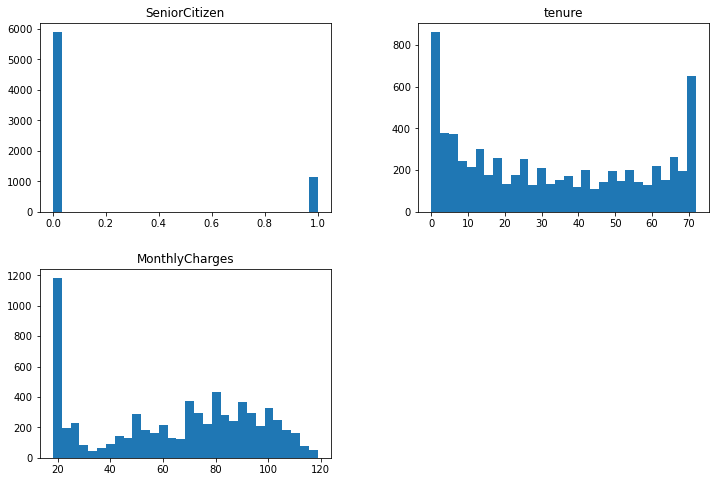

In [15]:
# Distribution of Numerical attribures
df[numerical_features[:]].hist(bins=30, figsize=(12,8), grid=False)
plt.tight_layout
plt.show()

Since "SeniorCitizen" has only two values 0 & 1 which implies "No" or "Yes", it's a categorical variable.

In [16]:
# Converting integer value of "SenioCitizen" to string (Categorical)
df["SeniorCitizen"] = df["SeniorCitizen"].astype('str')

In [17]:
# Statistical summary of numerical features of the dataset
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

1. There are 7043 records/rows and 21 columns/attributes in the dataset
2. There are 3 Numerical attributes and remaining 18 are Categorical types of data attributes
3. There is no missing/null value in the dataset

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [18]:
##---------Type the code below this line------------------##

In [19]:
# Checking duplicate data
duplicate_count = df.duplicated().sum()
print(f'No. of duplicate entries: {duplicate_count}')

No. of duplicate entries: 0


In [20]:
# Checking missing data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing value in the dataset

In [21]:
# Checking data inconsistencies
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


"TotalCharges" has 6531 unique values and frequency 11. There could be few whitespace due to which it's not showing null value.

In [22]:
# Checking whitespace in feature "TotalCharges"
whitespace_count = len(df[df['TotalCharges'] == ' '])
print(f'There are {whitespace_count} whitespaces in feature "TotalCharges"')

There are 11 whitespaces in feature "TotalCharges"


## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [23]:
##---------Type the code below this line------------------##

1. There is no duplicate data to remove
2. There is no missing/null value to impute or remove
3. Removing data inconsistencies below :


In [24]:
# Removing 11 records from dataset as this count is very less (11 out of 7043)
df = df[df['TotalCharges'] != ' ']

In [25]:
# Converting "TotalCharges" to numerical attribute
df["TotalCharges"] = df["TotalCharges"].astype('float')

In [26]:
# Final numerical and categorical features after removing inconsistencies
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns
print(f'Numerical features: {numerical_features.to_list()}')
print(f'\nCategorical features: {categorical_features.to_list()}')

Numerical features: ['tenure', 'MonthlyCharges', 'TotalCharges']

Categorical features: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Removing unnecessary attribute

In [27]:
# Removing "customerID" attribute as it has no information
df.drop('customerID', axis=1, inplace=True)

Outlier indentification & treatment

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

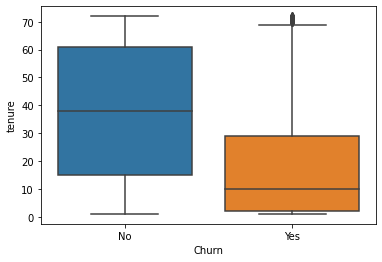

In [28]:
sns.boxplot(data=df, x='Churn', y='tenure')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

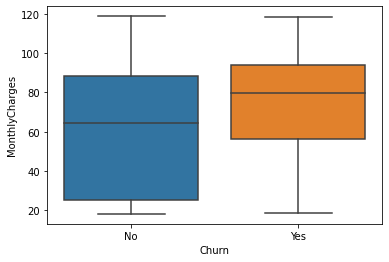

In [29]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

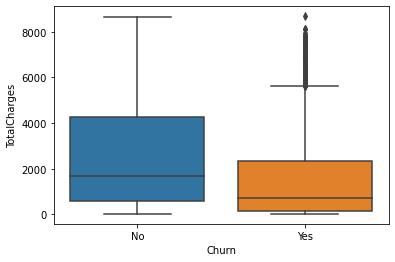

In [30]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

In [31]:
len(df[(df['TotalCharges']>6000) & (df['Churn']=='Yes') & (df['tenure']=='Yes')])

0

There is no potential outlier in the dataset

## 3.3 Encode categorical data

In [32]:
##---------Type the code below this line------------------##

In [33]:
df_encoded = pd.get_dummies(df, drop_first=True)


## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [34]:
##---------Type the code below this line------------------##

No Text data in this dataset

In [35]:
##---------Type the code below this line------------------##

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

In [36]:
##---------Type the code below this line------------------##

-    **Removing Duplicate Data**: We checked the dataset for any duplicate rows using the **duplicated()** method in pandas. If any duplicates are found, we would have used the drop_duplicates() method to remove them. **In our case no duplicate data was found**

-    **Imputing or Removing Missing Data**: We checked the dataset for any missing values using the **isnull()** method in pandas. If missing values are present, we would havecheck the percentage of missing data in each column. If the percentage of missing data is low, we could have used mean or median imputation to fill in missing values. If the percentage of missing data is high, you may consider removing the entire column or row containing the missing data.**In our case no missing datawas found**

-    **Removing Data Inconsistencies**: We checked the dataset for any data inconsistencies, such as outliers or invalid data entries. We used visualization techniques (box plots) to identify outliers. **In our dataset no outliers were found**. To check for invalid entries we used the **describe()** method in pandas. The output of this method provides information such as the count of unique values, the most frequent value, and the frequency of the most frequent value for each categorical column. This information helped identify inconsistencies in the data, such as misspelled categories or categories with low frequency or invalid data entries like **whitespaces**.  
**We found 11 records out of 7043 records with inconsistencies, so these were removed from the dataset.**


In [37]:
##---------Type the code below this line------------------##

There is no text data in the dataset

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [38]:
##---------Type the code below this line------------------##

In [39]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

Target variable is: "Churn"

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

In [40]:
##---------Type the code below this line------------------##

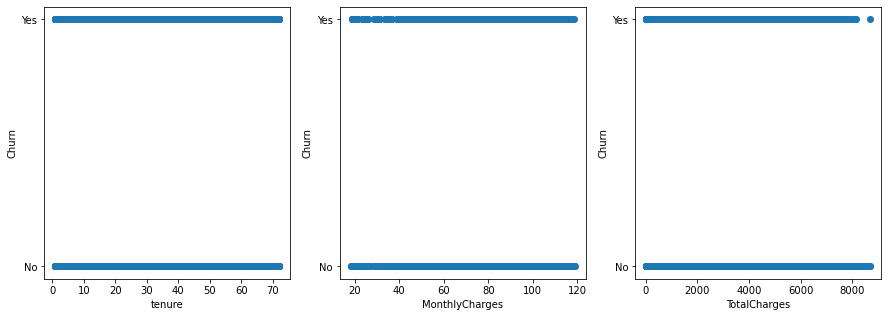

In [41]:
numerical_features = df.select_dtypes(include = [np.number]).columns
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))
target_col = 'Churn'
# Create scatter plots
for i, col in enumerate(numerical_features):
    axes[i].scatter(df[col], df[target_col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)

plt.show()

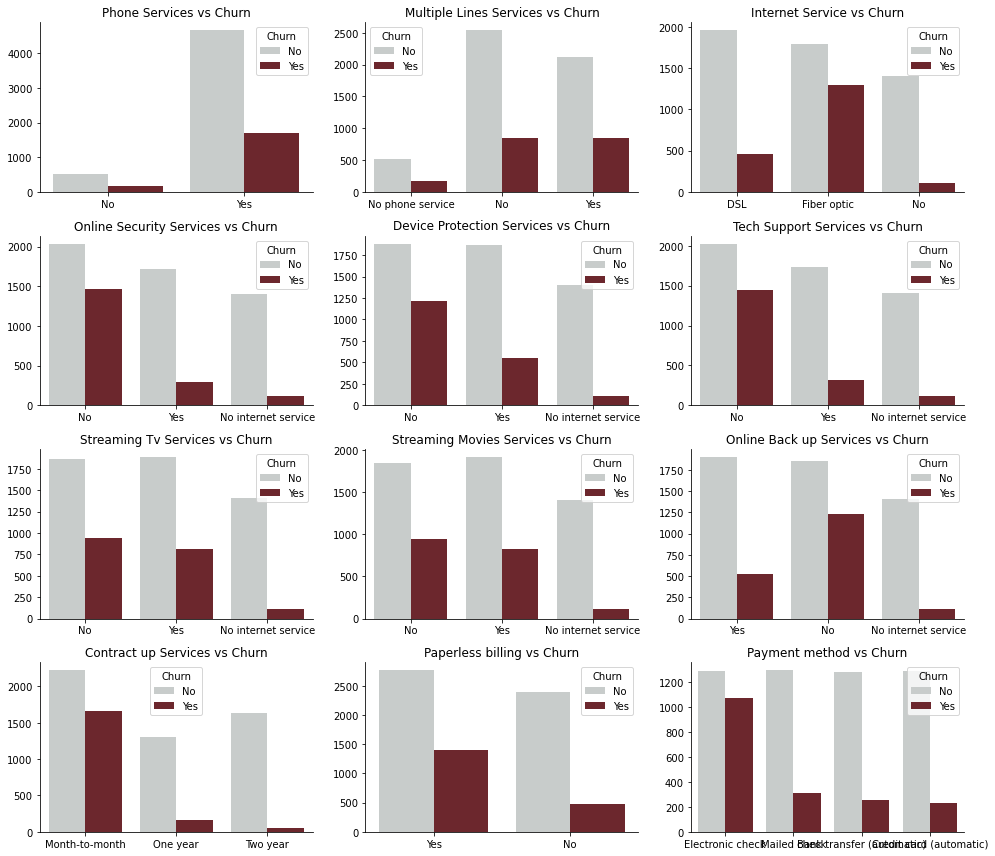

In [42]:
# Plotting Bar plots for categorical attributes
fig, axes = plt.subplots(4, 3, figsize=(14,12))
# Gray for No Churn, highlight Churn!
colors = ["#C7CDCB", "#781B24"]
# Set custom color palette
sns.set_palette(sns.color_palette(colors))
sns.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0,0]).set(title='Phone Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[0,1]).set(title='Multiple Lines Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="InternetService", hue="Churn", data=df, ax=axes[0,2]).set(title='Internet Service vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[1,0]).set(title='Online Security Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[1,1]).set(title='Device Protection Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[1,2]).set(title='Tech Support Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[2,0]).set(title='Streaming Tv Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2,1]).set(title='Streaming Movies Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="OnlineBackup", hue="Churn",data=df, ax=axes[2,2]).set(title='Online Back up Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="Contract", hue="Churn",data=df, ax=axes[3,0]).set(title='Contract up Services vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="PaperlessBilling", hue="Churn",data=df, ax=axes[3,1]).set(title='Paperless billing vs Churn', xlabel=None, ylabel = None)
sns.countplot(x="PaymentMethod", hue="Churn",data=df, ax=axes[3,2]).set(title='Payment method vs Churn', xlabel=None, ylabel = None)
sns.despine()
plt.tight_layout()
plt.show()

Observations:
1. Most of the Churn customers have Fiber optic as Internet service
2. Most of the Churn customers have no Technical support
3. Most of the Churn customers have no Device protection
4. Most of the Churn customers have no Online security
5. Most of the Churn customers have no Online backup
6. Most of the Churn customers are of Month-to-month contract type
7. Most of the Churn customers have Electronic check as Payment method

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [43]:
##---------Type the code below this line------------------##

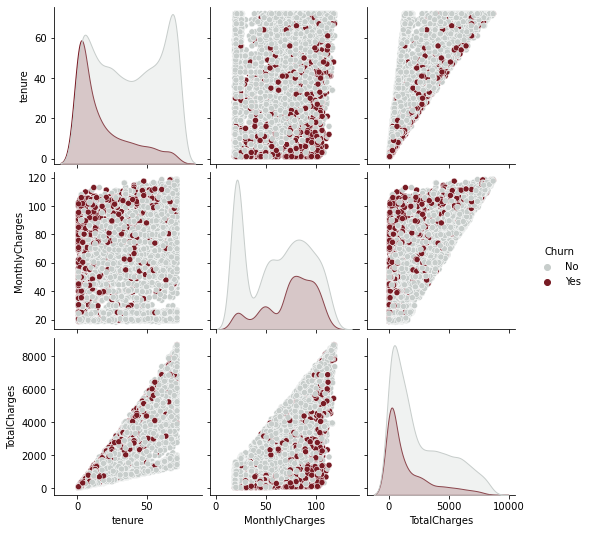

In [44]:
sns.pairplot(data=df, hue='Churn')

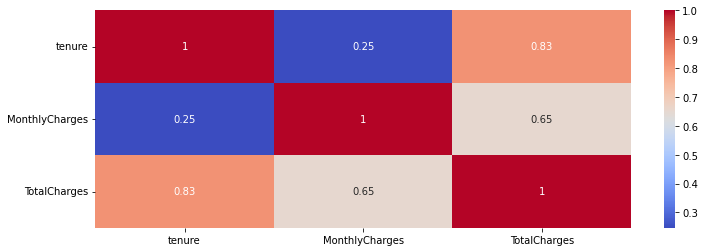

In [45]:
#Correlation check
plt.subplots(figsize=(12,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

Observations:
1. "tenure" and "TotalCharges" are highly correlated to each other.
2. "TotalCharges" and "MonthlyCharges" are moderatey correlated.

# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

In [46]:
##---------Type the code below this line------------------##

 Here, we will be using two techniques, mutual information and chi-squared test.

-    **Mutual Information** (Information Gain) is a technique used to measure the mutual dependence between two variables. It is commonly used for feature selection in classification tasks. The higher the mutual information between a feature and the target variable, the more significant the feature is in predicting the target variable.

-    **Chi-Squared Test** is another technique used for feature selection in classification tasks. It tests the independence between two variables by comparing the observed distribution with the expected distribution assuming independence. The higher the chi-squared value, the more significant the feature is in predicting the target variable.

In [47]:
# Separate the target variable from the feature matrix
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Use mutual information to select top 5 features
mutual_info = mutual_info_classif(X, y)
mutual_info_df = pd.DataFrame({'feature': X.columns, 'mutual_info': mutual_info})
top_5_mutual_info = mutual_info_df.nlargest(5, 'mutual_info')['feature'].tolist()
print(f'Top 5 significant features using Mutul Information: {top_5_mutual_info}')

# Use chi-squared test to select top 5 features
chi2_test, p_values = chi2(X, y)
chi2_df = pd.DataFrame({'feature': X.columns, 'chi2': chi2_test})
top_5_chi2 = chi2_df.nlargest(5, 'chi2')['feature'].tolist()
print(f'\nTop 5 significant features using chi-squared test: {top_5_chi2}')

Top 5 significant features using Mutul Information: ['tenure', 'Contract_Two year', 'InternetService_Fiber optic', 'MonthlyCharges', 'TotalCharges']

Top 5 significant features using chi-squared test: ['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Electronic check']


## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

In [48]:
##---------Type the code below this line------------------##

**Observations:**

-    **Mutual Information**: Mutual Information is a measure of the dependence between two variables. It measures how much information one variable can provide about the other. We have used the mutual_info_classif() function from scikit-learn to calculate the mutual information between each feature and the target variable. The top 5 features selected using mutual information are:
      -  tenure
      -  Contract_Two year
      -  InternetService_Fiber optic
      -  MonthlyCharges
      -  TotalCharges

-    **Chi-Squared test**: Chi-Squared test is a statistical test to determine if there is a significant association between two variables. We have used the chi2() function from scikit-learn to calculate the chi-squared statistics between each feature and the target variable. The top 5 features selected using chi-squared test are:
      -  TotalCharges
      -  tenure
      -  MonthlyCharges
      -  Contract_Two year
      -  PaymentMethod_Electronic check

**Justification of the method:**

We have used Mutual Information and Chi-Squared test to select the top 5 significant features because these methods are suitable for both categorical and numerical features. Mutual Information measures the dependence between two variables, while Chi-Squared test determines the association between two variables. Both methods are commonly used for feature selection in classification problems.


# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

We will be using two machine learning algorithms: Logistic Regression and Random Forest.

## 6.1 ML technique 1 + Justification

In [49]:
##---------Type the code below this line------------------##


**Logistic Regression:**

We have chosen Logistic regression as it is a simple and efficient algorithm for binary classification problems like churn prediction as its can handle both categorical and numerical data. It models the probability of the binary output variable based on the input features. It is a linear model that uses a sigmoid function to map the output of the linear equation to a probability value between 0 and 1. Logistic Regression is easy to implement, interpret, and it provides the probability estimates of the predicted outcomes. Hence, Logistic Regression can be a good choice for the churn prediction problem.

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

## 6.2 ML technique 2 + Justification

In [51]:
##---------Type the code below this line------------------##

**Random Forest:**

We have chose Random Forest as is an ensemble algorithm that creates a set of decision trees from random subsets of the data and random subsets of the features. It is a non-linear model that can handle both categorical and numerical data. Random Forest has the ability to capture non-linear relationships between the features and the target variable. It is also robust to outliers and missing data. Random Forest can provide feature importance measures, which can be helpful in understanding the important features that contribute to churn prediction. Hence, Random Forest will be a good choice for the churn prediction problem.

In [52]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [53]:
##---------Type the code below this line------------------##

Code to disable scrolling

In [54]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Logistic Regression Accuracy: 0.7846481876332623

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



Random Forest Accuracy: 0.7818052594171997

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407




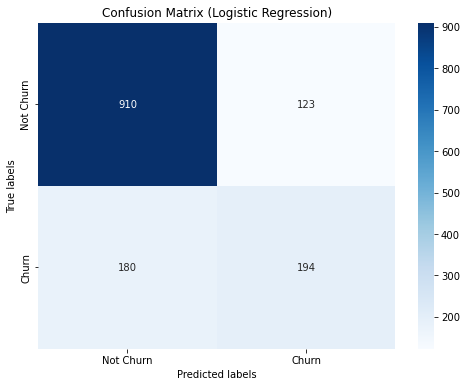

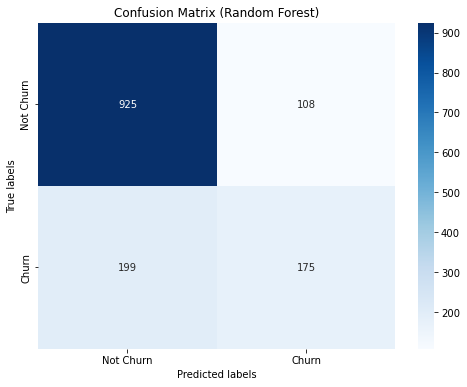

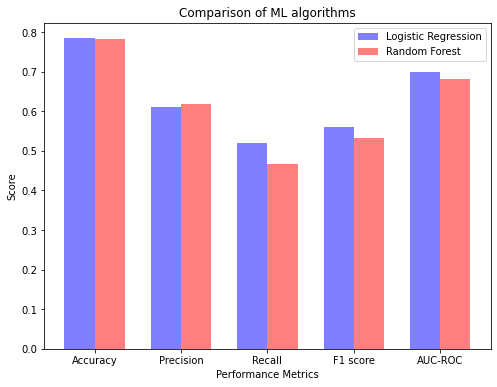

In [55]:
# Evaluate performance using various metrics
lr_acc = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy:', lr_acc)
print('\nClassification Report:')
print(classification_report(y_test, lr_pred))
print('\n======================================================')

rf_acc = accuracy_score(y_test, rf_pred)
print('\nRandom Forest Accuracy:', rf_acc)
print('\nClassification Report:')
print(classification_report(y_test, rf_pred))
print('\n======================================================')

# Get confusion matrix for logistic regression
cm_lr = confusion_matrix(y_test, lr_pred)

# Get confusion matrix for random forest
cm_rf = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for logistic regression
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Logistic Regression)')

# Plot confusion matrix for random forest
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix (Random Forest)')
plt.show()

lr_acc = accuracy_score(y_test, lr_pred)
rf_acc = accuracy_score(y_test, rf_pred)

lr_prec = precision_score(y_test, lr_pred)
rf_prec = precision_score(y_test, rf_pred)

lr_recall = recall_score(y_test, lr_pred)
rf_recall = recall_score(y_test, rf_pred)

lr_f1 = f1_score(y_test, lr_pred)
rf_f1 = f1_score(y_test, rf_pred)

lr_auc = roc_auc_score(y_test, lr_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

# Plot the results using a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC-ROC']
lr_scores = [lr_acc, lr_prec, lr_recall, lr_f1, lr_auc]
rf_scores = [rf_acc, rf_prec, rf_recall, rf_f1, rf_auc]

fig, ax = plt.subplots(figsize=(8, 6))

# Set the width of the bars
bar_width = 0.35

# Set the x-axis positions of the bars
x_pos = np.arange(len(metrics))

# Plot the bars for Logistic Regression
ax.bar(x_pos - bar_width/2, lr_scores, width=bar_width, color='b', alpha=0.5, label='Logistic Regression')

# Plot the bars for Random Forest
ax.bar(x_pos + bar_width/2, rf_scores, width=bar_width, color='r', alpha=0.5, label='Random Forest')

# Set the x-axis labels and title
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics)
ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Score')
ax.set_title('Comparison of ML algorithms')

# Add a legend
ax.legend()

# Show the plot
plt.show()

**Observations**:

From the comparison of the two machine learning algorithms, we can observe the following:

-    Both the algorithms are performing well in terms of accuracy, precision, recall, and F1 score. However, Logistic Regression is performing slightly better than Random Forest in terms of all these metrics except Precision.

-    The AUC-ROC score is also higher for Logistic Regression, indicating that it has better overall performance in terms of separating the positive and negative classes.

-    The confusion matrix for Logistic Regression shows that it has a higher true positive rate than Random Forest, which means it is better at identifying customers who are likely to churn.

-    In terms of computational complexity, Random Forest is more complex than Logistic Regression, which may be a consideration if we have a very large dataset or limited computing resources.

Overall, based on the performance metrics and the observations, we can conclude that Logistic Regression is a better algorithm for this particular problem of predicting customer churn in a telecom company.

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

**Proposed Solution**:


Based on the analysis and modeling, the solution proposed to solve the business problem of customer churn is to focus on the top factors that influence churn and implement targeted strategies to retain these customers. The top factors identified through feature selection include contract type, tenure, payment method, and internet service.

Some potential strategies that could be implemented to retain customers based on these factors include offering incentives for customers to switch to longer-term contracts, improving the payment experience for customers, and enhancing the quality of internet service. Additionally, it may be useful to conduct further analysis to identify specific customer segments that are most at risk for churn and tailor retention strategies to these segments.


**Learnings**:

In terms of learnings, this project highlights the importance of data cleaning and feature engineering in machine learning. It also underscores the importance of understanding the business problem and domain in order to make informed decisions about data preprocessing, feature selection, and modeling. Additionally, it demonstrates the usefulness of various machine learning algorithms and performance metrics for solving classification problems. Finally, it highlights the need for ongoing monitoring and evaluation of models to ensure their effectiveness in solving the business problem over time.

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!